Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import math
import scipy
from scipy import stats
from scipy.stats import skew 
from scipy.stats import kurtosis 

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pip install geopy

Get Data

In [3]:
demographics = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 3\cleaned_data.csv")

In [4]:
demographics.head()

,start_ward,number_of_start_stations,number_of_end_stations,number_of_rides,average_trip_duration,average_trip_duration_members,average_trip_duration_casual,member,casual,classic_bike,...,ethnicity_aa,poverty_rate,bike_lane_density,average_daily_traffic,crime_rate,unemployment_rate,mean_travel_to_work,bike_to_work,households_with_vehicle,geometry
0,Ward 1,160,374,1247543,13.896257,11.728457,18.719141,860682,386861,988291,...,23.0,11.0,7,35,5.0,4.0,30.2,6.0,54.0,NaN
1,Ward 2,223,385,3663830,22.805109,12.642163,36.373174,2094773,1569057,2960179,...,11.0,12.0,7,30,3.5,2.5,24.4,4.0,52.0,NaN
2,Ward 3,63,353,223591,18.378207,14.308628,25.850288,144753,78838,164583,...,8.0,8.0,4,25,4.0,3.0,27.3,3.0,78.0,NaN
3,Ward 4,144,354,162713,17.485271,15.070285,21.836179,104635,58078,108936,...,48.0,9.0,6,20,6.0,4.6,34.2,3.0,78.0,NaN
4,Ward 5,133,378,546158,16.517012,13.496042,22.265438,358012,188146,436905,...,59.0,16.0,3,15,8.0,5.4,31.6,3.0,70.0,NaN


In [5]:
demographics.columns

Index(['start_ward', 'number_of_start_stations', 'number_of_end_stations',
       'number_of_rides', 'average_trip_duration',
       'average_trip_duration_members', 'average_trip_duration_casual',
       'member', 'casual', 'classic_bike', 'electric_bike', 'docked_bike',
       'ward', 'population', 'ward_size', 'population_density',
       'median_per_capita_income', 'ethnicity_aa', 'poverty_rate',
       'bike_lane_density', 'average_daily_traffic', 'crime_rate',
       'unemployment_rate', 'mean_travel_to_work', 'bike_to_work',
       'households_with_vehicle', 'geometry'],
      dtype='object')

In [6]:
demographics.dtypes

start_ward                        object
number_of_start_stations           int64
number_of_end_stations             int64
number_of_rides                    int64
average_trip_duration            float64
average_trip_duration_members    float64
average_trip_duration_casual     float64
member                             int64
casual                             int64
classic_bike                       int64
electric_bike                      int64
docked_bike                        int64
ward                              object
population                         int64
ward_size                        float64
population_density                 int64
median_per_capita_income           int64
ethnicity_aa                     float64
poverty_rate                     float64
bike_lane_density                  int64
average_daily_traffic              int64
crime_rate                       float64
unemployment_rate                float64
mean_travel_to_work              float64
bike_to_work    

In [7]:
demographics['start_ward']

0    Ward 1
1    Ward 2
2    Ward 3
3    Ward 4
4    Ward 5
5    Ward 6
6    Ward 7
7    Ward 8
Name: start_ward, dtype: object

In [8]:
# Remove the "Ward " prefix and convert the column to integers
demographics['start_ward'] = demographics['start_ward'].str.replace('Ward ', '').astype(int)

# Check the result
demographics['start_ward'].head()

0    1
1    2
2    3
3    4
4    5
Name: start_ward, dtype: int32

In [9]:
demographics.columns

Index(['start_ward', 'number_of_start_stations', 'number_of_end_stations',
       'number_of_rides', 'average_trip_duration',
       'average_trip_duration_members', 'average_trip_duration_casual',
       'member', 'casual', 'classic_bike', 'electric_bike', 'docked_bike',
       'ward', 'population', 'ward_size', 'population_density',
       'median_per_capita_income', 'ethnicity_aa', 'poverty_rate',
       'bike_lane_density', 'average_daily_traffic', 'crime_rate',
       'unemployment_rate', 'mean_travel_to_work', 'bike_to_work',
       'households_with_vehicle', 'geometry'],
      dtype='object')

In [10]:
import geopandas as gpd

# Correct way to load a GeoJSON file using geopandas
wards = gpd.read_file(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 3\Wards_from_2022.geojson")

# Check the first few rows to ensure it's loaded correctly
wards.head()


,WARD,NAME,REP_NAME,WEB_URL,REP_PHONE,REP_EMAIL,REP_OFFICE,WARD_ID,LABEL,STUSAB,...,P0050010,OBJECTID,SHAPEAREA,SHAPELEN,GLOBALID,CREATED_USER,CREATED_DATE,LAST_EDITED_USER,LAST_EDITED_DATE,geometry
0,8,Ward 8,"Trayon White, Sr.",https://www.dccouncil.us/council/councilmember...,(202) 724-8045,twhite@dccouncil.us,"1350 Pennsylvania Ave, Suite 400, NW 20004",8,Ward 8,DC,...,1745,1,0,0,{E31550AE-6FAE-4B74-909F-52B283BFAF68},None,None,None,NaT,"POLYGON ((-76.99392 38.87771, -77.00336 38.880..."
1,6,Ward 6,Charles Allen,https://www.dccouncil.us/council/councilmember...,(202) 724-8072,callen@dccouncil.us,"1350 Pennsylvania Ave, Suite 110, NW 20004",6,Ward 6,DC,...,887,2,0,0,{765C4F49-9292-4BDB-AA24-39F4EE43359F},None,None,JLAY,2023-12-08 01:08:04+00:00,"POLYGON ((-77.00908 38.87162, -77.00908 38.871..."
2,7,Ward 7,Vincent Gray,https://dccouncil.us/council/vincent-gray,(202) 724-8068,vgray@dccouncil.us,"1350 Pennsylvania Ave, Suite 406, NW 20004",7,Ward 7,DC,...,1971,3,0,0,{73F07042-7D7F-452B-9BB3-0F87B0EC5418},None,None,None,NaT,"POLYGON ((-76.94186 38.91854, -76.942 38.91842..."
3,2,Ward 2,Brooke Pinto,https://www.dccouncil.us/council/ward-2-counci...,(202) 724-8058,bpinto@dccouncil.us,"1350 Pennsylvania Ave, Suite 106, NW 20004",2,Ward 2,DC,...,1543,4,0,0,{7F8C2A51-427C-45FC-91EB-9693656AED9C},None,None,None,NaT,"POLYGON ((-77.0327 38.88262, -77.03236 38.8831..."
4,1,Ward 1,Brianne Nadeau,https://dccouncil.us/council/brianne-nadeau,(202) 724-8181,bnadeau@dccouncil.us,"1350 Pennsylvania Ave, Suite 108, NW 20004",1,Ward 1,DC,...,752,5,0,0,{C3C6E2E7-E68D-49B2-970C-D60675EA7B4B},None,None,JLAY,2023-12-08 01:08:04+00:00,"POLYGON ((-77.03523 38.93743, -77.0357 38.9374..."


In [11]:
import pandas as pd
import geopandas as gpd

# Step 1: Ensure that the 'start_ward' column in demographics is numeric (if it's not already)
demographics['start_ward'] = demographics['start_ward'].astype(int)

# Step 2: Ensure that the 'WARD' column in wards GeoDataFrame is numeric (if it's not already)
wards['WARD'] = wards['WARD'].astype(int)

# Step 3: Perform the merge on the 'start_ward' and 'WARD' columns
demo_ward = demographics.merge(wards[['WARD', 'geometry']], left_on='start_ward', right_on='WARD', how='left')

# Step 4: Check if 'geometry' was successfully merged and handle the geometry columns
if 'geometry_y' in demo_ward.columns:
    # Rename the 'geometry_y' column to 'geometry'
    demo_ward = demo_ward.rename(columns={'geometry_y': 'geometry'})
    
    # Drop the 'geometry_x' column, as it is not needed
    demo_ward = demo_ward.drop(columns=['geometry_x'])

    # Step 5: Convert to GeoDataFrame
    demo_ward = gpd.GeoDataFrame(demo_ward, geometry='geometry')

    # Step 6: Validate geometries
    validity_check = demo_ward['geometry'].is_valid
    if not validity_check.all():
        print("Invalid geometries found. Removing them.")
        demo_ward = demo_ward[validity_check]

    # Step 7: Export the merged data to CSV or GeoJSON as needed
    # Drop the 'geometry' column for the CSV export (if you want to save it without geometries)
    demo_ward.drop(columns='geometry').to_csv('demo_ward.csv', index=False)

    # Save the GeoDataFrame (with geometry) to a GeoJSON file
    demo_ward.to_file('demo_ward.geojson', driver='GeoJSON')

# Step 8: Check the merged data
demo_ward.head()  # Print first few rows of the merged data



,start_ward,number_of_start_stations,number_of_end_stations,number_of_rides,average_trip_duration,average_trip_duration_members,average_trip_duration_casual,member,casual,classic_bike,...,poverty_rate,bike_lane_density,average_daily_traffic,crime_rate,unemployment_rate,mean_travel_to_work,bike_to_work,households_with_vehicle,WARD,geometry
0,1,160,374,1247543,13.896257,11.728457,18.719141,860682,386861,988291,...,11.0,7,35,5.0,4.0,30.2,6.0,54.0,1,"POLYGON ((-77.03523 38.93743, -77.0357 38.9374..."
1,2,223,385,3663830,22.805109,12.642163,36.373174,2094773,1569057,2960179,...,12.0,7,30,3.5,2.5,24.4,4.0,52.0,2,"POLYGON ((-77.0327 38.88262, -77.03236 38.8831..."
2,3,63,353,223591,18.378207,14.308628,25.850288,144753,78838,164583,...,8.0,4,25,4.0,3.0,27.3,3.0,78.0,3,"POLYGON ((-77.05808 38.95676, -77.05809 38.956..."
3,4,144,354,162713,17.485271,15.070285,21.836179,104635,58078,108936,...,9.0,6,20,6.0,4.6,34.2,3.0,78.0,4,"POLYGON ((-77.04097 38.99597, -77.07174 38.971..."
4,5,133,378,546158,16.517012,13.496042,22.265438,358012,188146,436905,...,16.0,3,15,8.0,5.4,31.6,3.0,70.0,5,"POLYGON ((-76.99144 38.9573, -76.99163 38.9572..."


In [12]:
import pandas as pd
import geopandas as gpd

# Step 1: Clean percentage columns (remove '%' and convert commas to dots)
def clean_percentage_columns(df):
    for column in df.columns:
        # Check if the column contains percentage signs
        if df[column].dtype == 'object' and df[column].str.contains('%').any():
            print(f"Cleaning percentage column: {column}")
            # Remove the '%' sign, replace ',' with '.', and convert to float
            df[column] = df[column].str.replace('%', '', regex=False).str.replace(',', '.', regex=False).astype(float)
    return df

# Clean the DataFrame (remove '%' and convert commas to dots in percentage columns)
demo_ward_cleaned = clean_percentage_columns(demo_ward)

# Step 2: No need to re-parse geometry as it's already in the correct format after merging
# Check if the 'geometry' column is valid (optional step, but safe if unsure)
if 'geometry' in demo_ward_cleaned.columns:
    # You can optionally check if the geometries are valid, but this might be redundant
    validity_check = demo_ward_cleaned['geometry'].is_valid
    if not validity_check.all():
        print("Invalid geometries found. Removing them.")
        demo_ward_cleaned = demo_ward_cleaned[validity_check]

# Step 3: Convert the cleaned DataFrame to a GeoDataFrame (this is necessary to preserve geometries)
demo_ward_cleaned = gpd.GeoDataFrame(demo_ward_cleaned, geometry='geometry')

# Step 4: Export the cleaned data (with geometries)
demo_ward_cleaned.to_file('demo_ward_cleaned.geojson', driver='GeoJSON')  # Save as GeoJSON

# Optionally, you can export a CSV without geometry
demo_ward_cleaned.drop(columns='geometry').to_csv('demo_ward_cleaned.csv', index=False)

# Step 5: Check the cleaned data (GeoDataFrame)
print(demo_ward_cleaned.head())  # View the first few rows of the cleaned data



   start_ward  number_of_start_stations  number_of_end_stations  \
0           1                       160                     374   
1           2                       223                     385   
2           3                        63                     353   
3           4                       144                     354   
4           5                       133                     378   

   number_of_rides  average_trip_duration  average_trip_duration_members  \
0          1247543              13.896257                      11.728457   
1          3663830              22.805109                      12.642163   
2           223591              18.378207                      14.308628   
3           162713              17.485271                      15.070285   
4           546158              16.517012                      13.496042   

   average_trip_duration_casual   member   casual  classic_bike  ...  \
0                     18.719141   860682   386861        988291  ...

In [13]:
demo_ward_cleaned.head()

,start_ward,number_of_start_stations,number_of_end_stations,number_of_rides,average_trip_duration,average_trip_duration_members,average_trip_duration_casual,member,casual,classic_bike,...,poverty_rate,bike_lane_density,average_daily_traffic,crime_rate,unemployment_rate,mean_travel_to_work,bike_to_work,households_with_vehicle,WARD,geometry
0,1,160,374,1247543,13.896257,11.728457,18.719141,860682,386861,988291,...,11.0,7,35,5.0,4.0,30.2,6.0,54.0,1,"POLYGON ((-77.03523 38.93743, -77.0357 38.9374..."
1,2,223,385,3663830,22.805109,12.642163,36.373174,2094773,1569057,2960179,...,12.0,7,30,3.5,2.5,24.4,4.0,52.0,2,"POLYGON ((-77.0327 38.88262, -77.03236 38.8831..."
2,3,63,353,223591,18.378207,14.308628,25.850288,144753,78838,164583,...,8.0,4,25,4.0,3.0,27.3,3.0,78.0,3,"POLYGON ((-77.05808 38.95676, -77.05809 38.956..."
3,4,144,354,162713,17.485271,15.070285,21.836179,104635,58078,108936,...,9.0,6,20,6.0,4.6,34.2,3.0,78.0,4,"POLYGON ((-77.04097 38.99597, -77.07174 38.971..."
4,5,133,378,546158,16.517012,13.496042,22.265438,358012,188146,436905,...,16.0,3,15,8.0,5.4,31.6,3.0,70.0,5,"POLYGON ((-76.99144 38.9573, -76.99163 38.9572..."


In [14]:
demo_ward_cleaned.columns

Index(['start_ward', 'number_of_start_stations', 'number_of_end_stations',
       'number_of_rides', 'average_trip_duration',
       'average_trip_duration_members', 'average_trip_duration_casual',
       'member', 'casual', 'classic_bike', 'electric_bike', 'docked_bike',
       'ward', 'population', 'ward_size', 'population_density',
       'median_per_capita_income', 'ethnicity_aa', 'poverty_rate',
       'bike_lane_density', 'average_daily_traffic', 'crime_rate',
       'unemployment_rate', 'mean_travel_to_work', 'bike_to_work',
       'households_with_vehicle', 'WARD', 'geometry'],
      dtype='object')

In [15]:
# Creating the new column 'member_rides_per_1000_residents'
demo_ward_cleaned['member_rides_per_1000_residents'] = (demo_ward_cleaned['member'] / demo_ward_cleaned['population']) * 1000

In [16]:
demo_ward_cleaned['station_density'] = (demo_ward_cleaned['number_of_start_stations'] / demo_ward_cleaned['ward_size'])

In [17]:
clean_data_select = demo_ward_cleaned[['station_density','member_rides_per_1000_residents', 'start_ward','population_density', 'median_per_capita_income', 'average_trip_duration', 'ethnicity_aa', 'average_trip_duration_members', 'bike_lane_density', 'average_daily_traffic', 'crime_rate', 'unemployment_rate', 'mean_travel_to_work', 'bike_to_work', 'households_with_vehicle', 'geometry']]

In [18]:
clean_data_select.columns

Index(['station_density', 'member_rides_per_1000_residents', 'start_ward',
       'population_density', 'median_per_capita_income',
       'average_trip_duration', 'ethnicity_aa',
       'average_trip_duration_members', 'bike_lane_density',
       'average_daily_traffic', 'crime_rate', 'unemployment_rate',
       'mean_travel_to_work', 'bike_to_work', 'households_with_vehicle',
       'geometry'],
      dtype='object')

### Demographic Maps

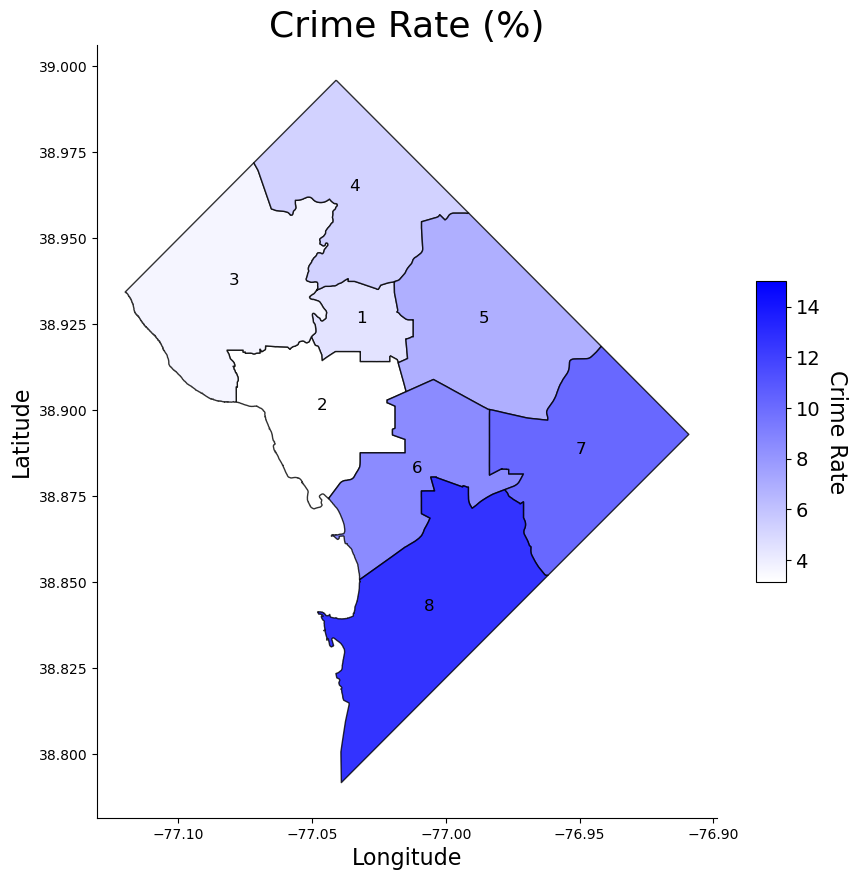

In [19]:
import pandas as pd  
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value for blue color mapping (standard normalization)
    normalized = (value - vmin) / (vmax - vmin)
    blue_value = int((1 - normalized) * 255)  # Reverse the normalization for reversed colors
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'crime_rate',
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a reversed gradient color bar (reverse color normalization)
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the color normalization
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # Reversed blue to white colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Crime Rate (%)", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot


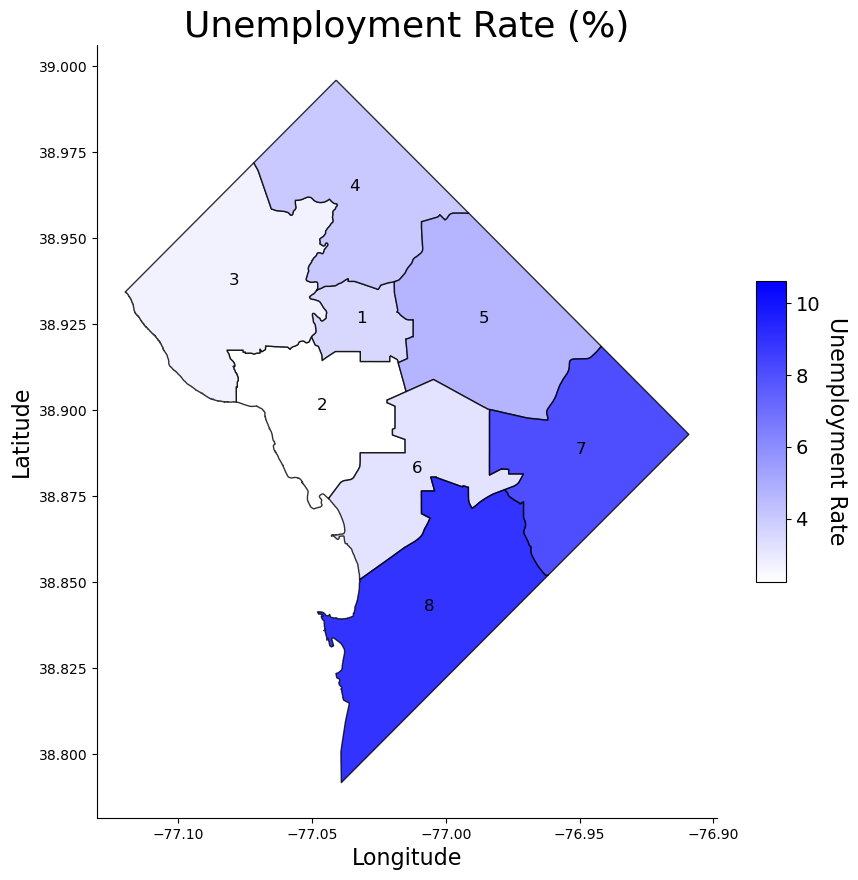

In [20]:
import pandas as pd  
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value for blue color mapping (standard normalization)
    normalized = (value - vmin) / (vmax - vmin)
    blue_value = int((1 - normalized) * 255)  # Reverse the normalization for reversed colors
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'unemployment_rate',
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a reversed gradient color bar (reverse color normalization)
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the color normalization
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # Reversed blue to white colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Unemployment Rate (%)", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot



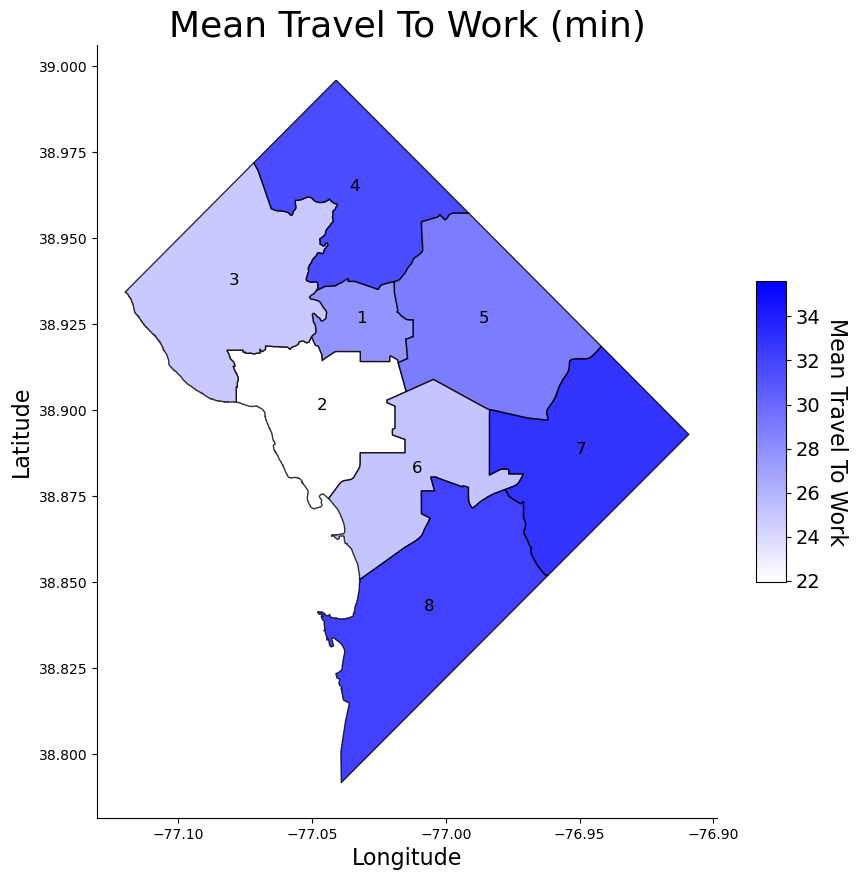

In [21]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value to be inverted for blue color mapping
    normalized = (value - vmin) / (vmax - vmin)  # Normalized color mapping (no inversion)
    blue_value = int((1 - normalized) * 255)  # Inverted normalized value for the blue channel
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'mean_travel_to_work',  # Replace with the column you want to visualize
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a gradient color bar with reversed colors (reversed blue scale)
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the color normalization
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # Blue to white colormap reversed
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Mean Travel To Work (min)", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot



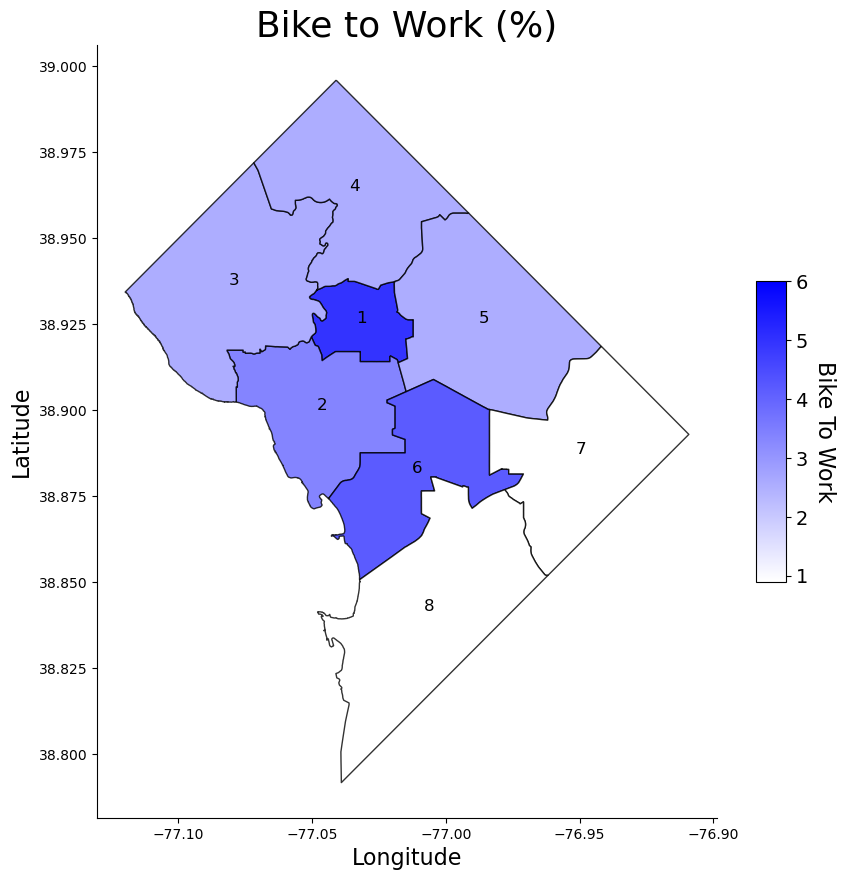

In [22]:
import pandas as pd  
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value to be inverted for blue color mapping
    normalized = (value - vmin) / (vmax - vmin)  # Standard normalization
    blue_value = int((1 - normalized) * 255)  # Reverse the normalization for reversed color scheme
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'bike_to_work',
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a gradient color bar using blue tones, reverse the normalization
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the normalization (max to min)
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # Reversed blue to white colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Bike to Work (%)", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot


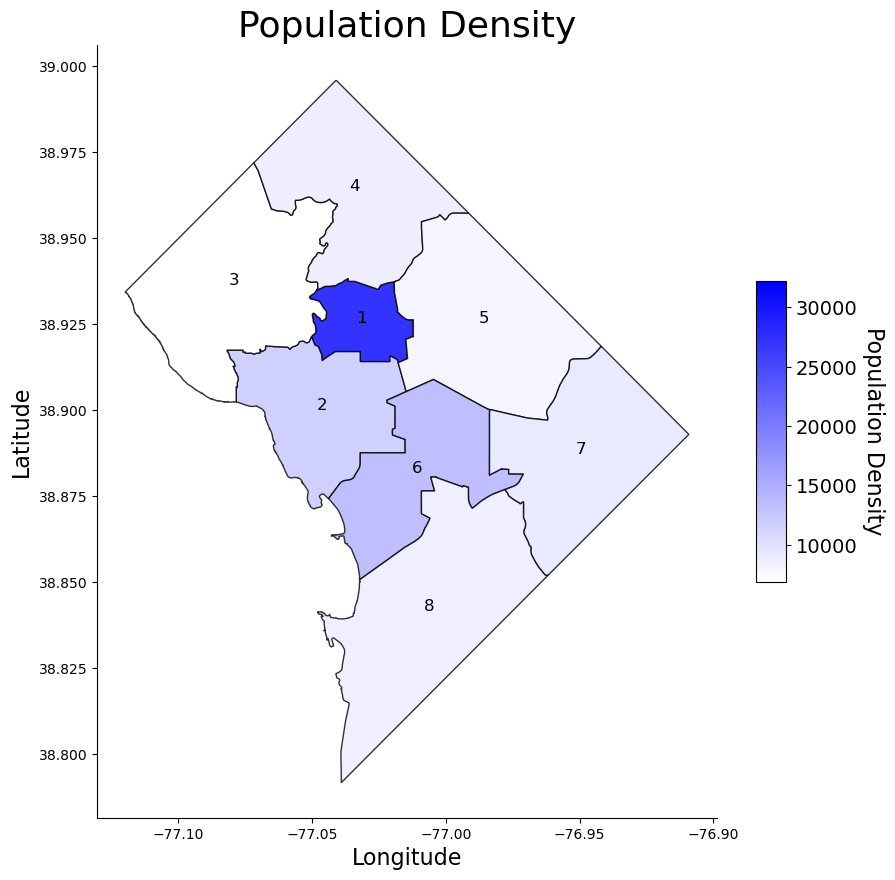

In [23]:
import pandas as pd  
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value for blue color mapping
    normalized = (value - vmin) / (vmax - vmin)  # Standard normalization (no inversion)
    blue_value = int((1 - normalized) * 255)  # Reverse the color intensity for blue
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'population_density',
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Reverse the color scale: Max value -> white, Min value -> blue
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the normalization (max to min)
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # White to Blue reversed colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Population Density", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot


In [24]:
clean_data_select


,station_density,member_rides_per_1000_residents,start_ward,population_density,median_per_capita_income,average_trip_duration,ethnicity_aa,average_trip_duration_members,bike_lane_density,average_daily_traffic,crime_rate,unemployment_rate,mean_travel_to_work,bike_to_work,households_with_vehicle,geometry
0,64.000000,10833.274595,1,32207,82626,13.896257,23.0,11.728457,7,35,5.0,4.0,30.2,6.0,54.0,"POLYGON ((-77.03523 38.93743, -77.0357 38.9374..."
1,37.796610,26889.158451,2,13162,103857,22.805109,11.0,12.642163,7,30,3.5,2.5,24.4,4.0,52.0,"POLYGON ((-77.0327 38.88262, -77.03236 38.8831..."
2,6.057692,1812.788819,3,7671,110390,18.378207,8.0,14.308628,4,25,4.0,3.0,27.3,3.0,78.0,"POLYGON ((-77.05808 38.95676, -77.05809 38.956..."
3,16.179775,1215.682402,4,9687,64486,17.485271,48.0,15.070285,6,20,6.0,4.6,34.2,3.0,78.0,"POLYGON ((-77.04097 38.99597, -77.07174 38.971..."
4,13.039216,3994.421386,5,8782,54520,16.517012,59.0,13.496042,3,15,8.0,5.4,31.6,3.0,70.0,"POLYGON ((-76.99144 38.9573, -76.99163 38.9572..."
5,30.943396,16934.816521,6,15273,92226,17.997648,23.0,12.249520,8,12,10.0,3.6,27.6,5.0,67.0,"POLYGON ((-77.00908 38.87162, -77.00908 38.871..."
6,6.516854,910.926894,7,10148,34830,21.355464,83.0,15.053691,2,10,12.0,9.5,35.6,1.0,61.0,"POLYGON ((-76.94186 38.91854, -76.942 38.91842..."
7,5.714286,1199.993107,8,9568,34000,20.971596,82.0,14.717615,1,8,15.0,10.6,34.8,1.0,56.0,"POLYGON ((-76.99392 38.87771, -77.00336 38.880..."


In [25]:
import pandas as pd

# Assuming clean_data_select is your existing DataFrame

# Create a dictionary with the food desert percentages
food_desert_data = {
    1: 15,
    2: 5,
    3: 2,
    4: 18,
    5: 30,
    6: 20,
    7: 40,
    8: 50
}

# Map the percentage data to a new column in clean_data_select
clean_data_select['% Residents in Food Deserts'] = clean_data_select['start_ward'].map(food_desert_data)

# Display the updated DataFrame
clean_data_select


c:\Users\janin\anaconda3\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,station_density,member_rides_per_1000_residents,start_ward,population_density,median_per_capita_income,average_trip_duration,ethnicity_aa,average_trip_duration_members,bike_lane_density,average_daily_traffic,crime_rate,unemployment_rate,mean_travel_to_work,bike_to_work,households_with_vehicle,geometry,% Residents in Food Deserts
0,64.000000,10833.274595,1,32207,82626,13.896257,23.0,11.728457,7,35,5.0,4.0,30.2,6.0,54.0,"POLYGON ((-77.03523 38.93743, -77.0357 38.9374...",15
1,37.796610,26889.158451,2,13162,103857,22.805109,11.0,12.642163,7,30,3.5,2.5,24.4,4.0,52.0,"POLYGON ((-77.0327 38.88262, -77.03236 38.8831...",5
2,6.057692,1812.788819,3,7671,110390,18.378207,8.0,14.308628,4,25,4.0,3.0,27.3,3.0,78.0,"POLYGON ((-77.05808 38.95676, -77.05809 38.956...",2
3,16.179775,1215.682402,4,9687,64486,17.485271,48.0,15.070285,6,20,6.0,4.6,34.2,3.0,78.0,"POLYGON ((-77.04097 38.99597, -77.07174 38.971...",18
4,13.039216,3994.421386,5,8782,54520,16.517012,59.0,13.496042,3,15,8.0,5.4,31.6,3.0,70.0,"POLYGON ((-76.99144 38.9573, -76.99163 38.9572...",30
5,30.943396,16934.816521,6,15273,92226,17.997648,23.0,12.249520,8,12,10.0,3.6,27.6,5.0,67.0,"POLYGON ((-77.00908 38.87162, -77.00908 38.871...",20
6,6.516854,910.926894,7,10148,34830,21.355464,83.0,15.053691,2,10,12.0,9.5,35.6,1.0,61.0,"POLYGON ((-76.94186 38.91854, -76.942 38.91842...",40
7,5.714286,1199.993107,8,9568,34000,20.971596,82.0,14.717615,1,8,15.0,10.6,34.8,1.0,56.0,"POLYGON ((-76.99392 38.87771, -77.00336 38.880...",50


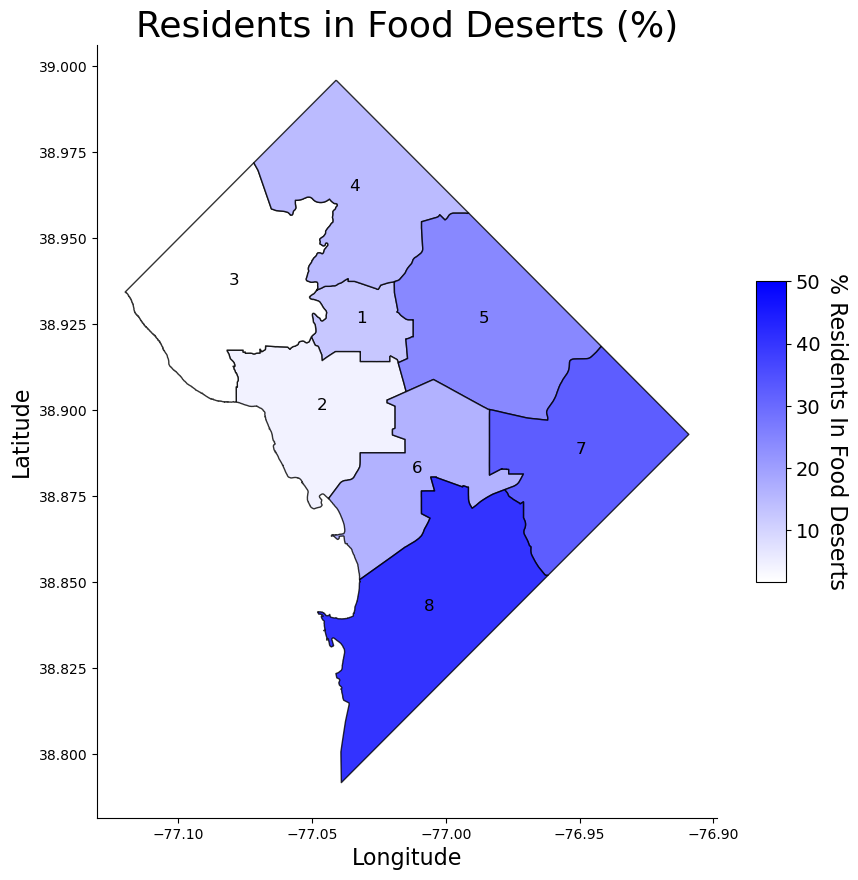

In [26]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value for blue color mapping (standard normalization)
    normalized = (value - vmin) / (vmax - vmin)
    blue_value = int((1 - normalized) * 255)  # Invert the normalization for reversed color
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    '% Residents in Food Deserts',  # Example column
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a reversed gradient color bar (reverse color normalization)
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the color normalization
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # Reversed blue to white colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Residents in Food Deserts (%)", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot




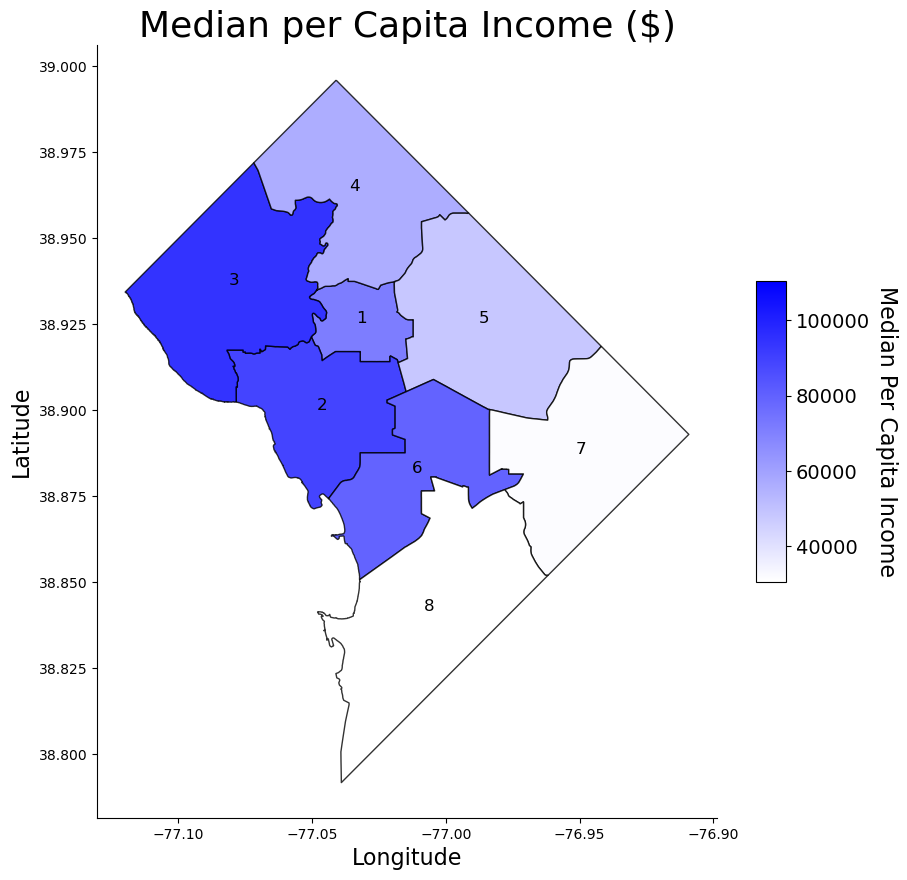

In [27]:
import pandas as pd  
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value for blue color mapping
    normalized = (value - vmin) / (vmax - vmin)  # Standard normalization (no inversion)
    blue_value = int((1 - normalized) * 255)  # Reverse the color intensity for blue (higher values are lighter)
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'median_per_capita_income',
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a gradient color bar using blue tones (reversed colormap)
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the normalization (max to min)
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # White to Blue reversed colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Median per Capita Income ($)", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot


In [28]:
clean_data_select.columns

Index(['station_density', 'member_rides_per_1000_residents', 'start_ward',
       'population_density', 'median_per_capita_income',
       'average_trip_duration', 'ethnicity_aa',
       'average_trip_duration_members', 'bike_lane_density',
       'average_daily_traffic', 'crime_rate', 'unemployment_rate',
       'mean_travel_to_work', 'bike_to_work', 'households_with_vehicle',
       'geometry', '% Residents in Food Deserts'],
      dtype='object')

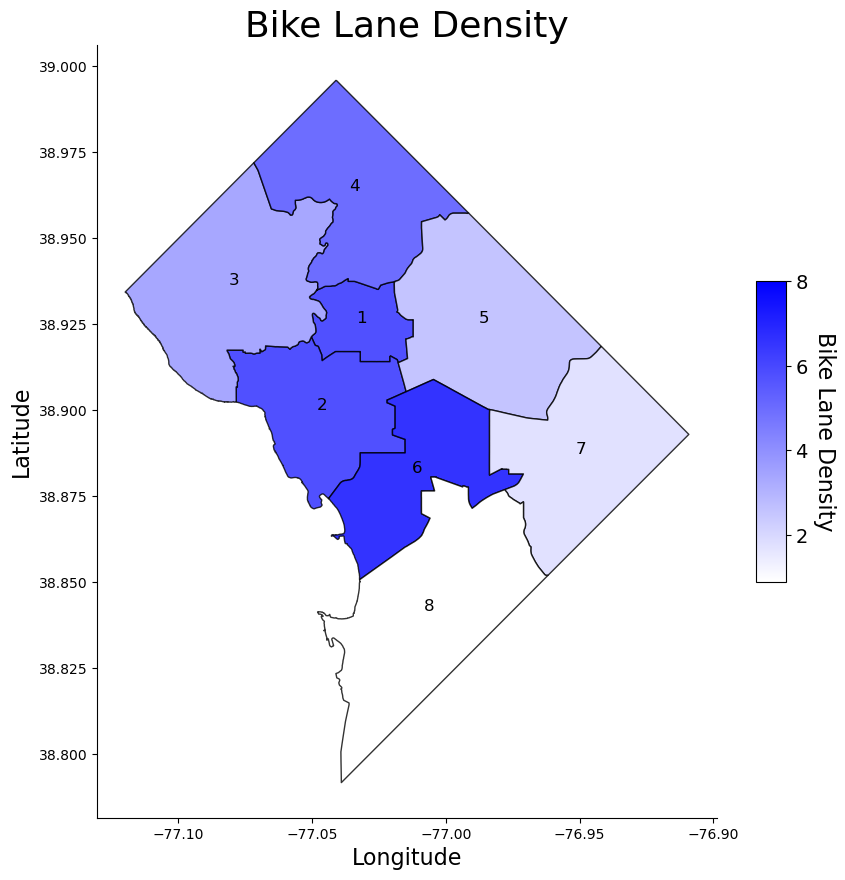

In [29]:
import pandas as pd  
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value for blue color mapping
    normalized = (value - vmin) / (vmax - vmin)  # Standard normalization (no inversion)
    blue_value = int((1 - normalized) * 255)  # Reverse the color intensity for blue (higher values are lighter)
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'bike_lane_density',
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a gradient color bar using blue tones (reversed colormap)
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the normalization (max to min)
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # White to Blue reversed colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Bike Lane Density", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot


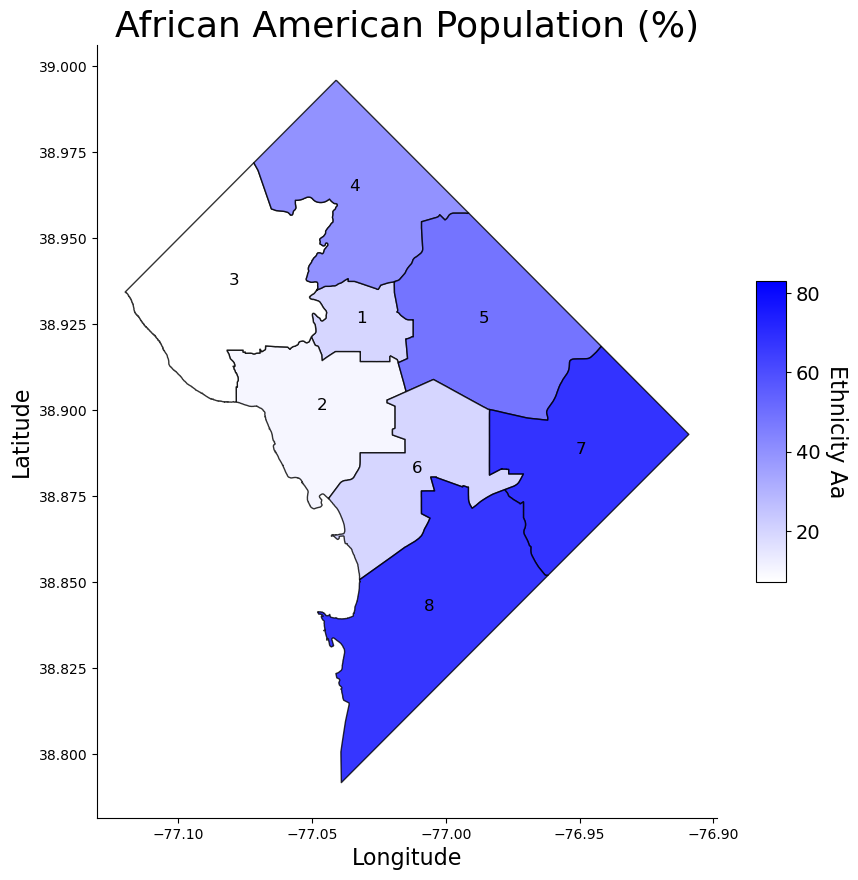

In [30]:
import pandas as pd  
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value for blue color mapping
    normalized = (value - vmin) / (vmax - vmin)  # Standard normalization (no inversion)
    blue_value = int((1 - normalized) * 255)  # Reverse the color intensity for blue (higher values are lighter)
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'ethnicity_aa',
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a gradient color bar using blue tones (reversed colormap)
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the normalization (max to min)
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # White to Blue reversed colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"African American Population (%)", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot


### KPIs

In [31]:
bike_data = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 3\bike_data_cleaned.csv")

C:\Users\janin\AppData\Local\Temp\ipykernel_6432\1761992738.py:1: DtypeWarning: Columns (9,13) have mixed types. Specify dtype option on import or set low_memory=False.
  bike_data = pd.read_csv(r"C:\Users\janin\OneDrive\Desktop\Python exercise\Project 3\bike_data_cleaned.csv")


In [32]:
bike_red = bike_data[['ride_id', 'start_date', 'end_date', 'start_lat', 'start_lng', 'member1_casual2']]
bike_red.head()

,ride_id,start_date,end_date,start_lat,start_lng,member1_casual2
0,1,2021-01-01,2021-01-01,38.880440,-77.025236,1
1,3,2021-01-01,2021-01-01,38.912138,-77.038568,1
2,4,2021-01-01,2021-01-01,38.879477,-77.114563,1
3,5,2021-01-01,2021-01-01,38.931322,-77.028247,1
4,7,2021-01-01,2021-01-01,38.900413,-76.982872,2


In [33]:
wards.head()

,WARD,NAME,REP_NAME,WEB_URL,REP_PHONE,REP_EMAIL,REP_OFFICE,WARD_ID,LABEL,STUSAB,...,P0050010,OBJECTID,SHAPEAREA,SHAPELEN,GLOBALID,CREATED_USER,CREATED_DATE,LAST_EDITED_USER,LAST_EDITED_DATE,geometry
0,8,Ward 8,"Trayon White, Sr.",https://www.dccouncil.us/council/councilmember...,(202) 724-8045,twhite@dccouncil.us,"1350 Pennsylvania Ave, Suite 400, NW 20004",8,Ward 8,DC,...,1745,1,0,0,{E31550AE-6FAE-4B74-909F-52B283BFAF68},None,None,None,NaT,"POLYGON ((-76.99392 38.87771, -77.00336 38.880..."
1,6,Ward 6,Charles Allen,https://www.dccouncil.us/council/councilmember...,(202) 724-8072,callen@dccouncil.us,"1350 Pennsylvania Ave, Suite 110, NW 20004",6,Ward 6,DC,...,887,2,0,0,{765C4F49-9292-4BDB-AA24-39F4EE43359F},None,None,JLAY,2023-12-08 01:08:04+00:00,"POLYGON ((-77.00908 38.87162, -77.00908 38.871..."
2,7,Ward 7,Vincent Gray,https://dccouncil.us/council/vincent-gray,(202) 724-8068,vgray@dccouncil.us,"1350 Pennsylvania Ave, Suite 406, NW 20004",7,Ward 7,DC,...,1971,3,0,0,{73F07042-7D7F-452B-9BB3-0F87B0EC5418},None,None,None,NaT,"POLYGON ((-76.94186 38.91854, -76.942 38.91842..."
3,2,Ward 2,Brooke Pinto,https://www.dccouncil.us/council/ward-2-counci...,(202) 724-8058,bpinto@dccouncil.us,"1350 Pennsylvania Ave, Suite 106, NW 20004",2,Ward 2,DC,...,1543,4,0,0,{7F8C2A51-427C-45FC-91EB-9693656AED9C},None,None,None,NaT,"POLYGON ((-77.0327 38.88262, -77.03236 38.8831..."
4,1,Ward 1,Brianne Nadeau,https://dccouncil.us/council/brianne-nadeau,(202) 724-8181,bnadeau@dccouncil.us,"1350 Pennsylvania Ave, Suite 108, NW 20004",1,Ward 1,DC,...,752,5,0,0,{C3C6E2E7-E68D-49B2-970C-D60675EA7B4B},None,None,JLAY,2023-12-08 01:08:04+00:00,"POLYGON ((-77.03523 38.93743, -77.0357 38.9374..."


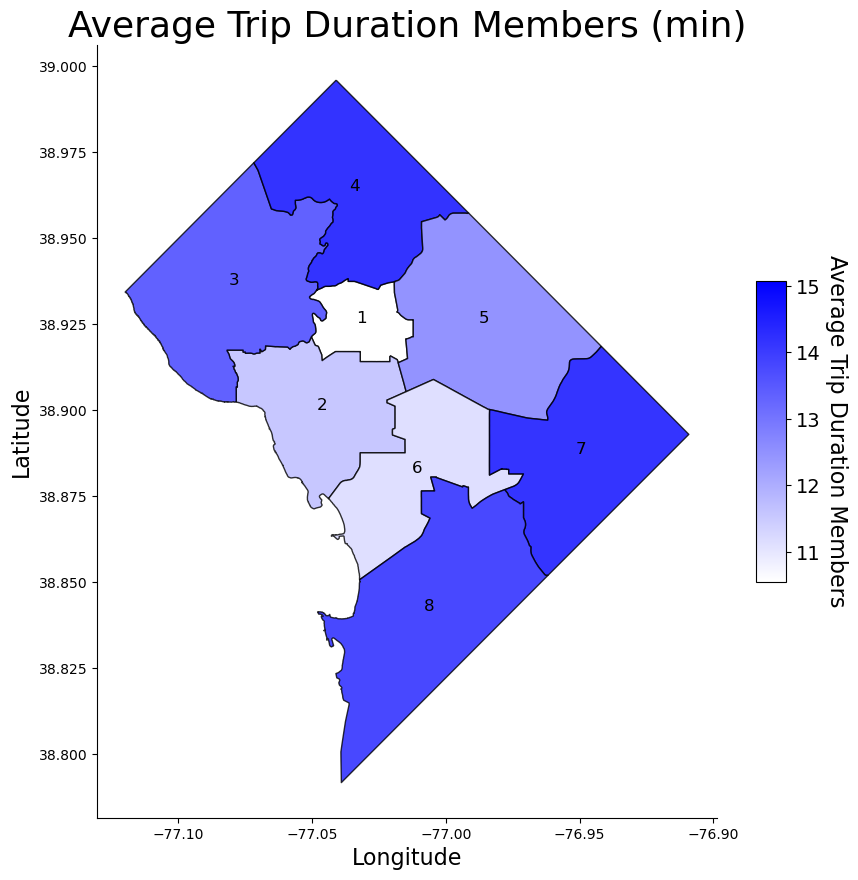

In [ ]:
import pandas as pd  
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value for blue color mapping
    normalized = (value - vmin) / (vmax - vmin)  # Standard normalization (no inversion)
    blue_value = int((1 - normalized) * 255)  # Reverse the color intensity for blue (higher values are lighter)
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'average_trip_duration_members',
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a gradient color bar using blue tones (reversed colormap)
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the normalization (max to min)
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # White to Blue reversed colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Average Trip Duration Members (min)", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot


In [ ]:
merged_gdf.columns

Index(['station_density', 'member_rides_per_1000_residents', 'start_ward',
       'population_density', 'median_per_capita_income',
       'average_trip_duration', 'ethnicity_aa',
       'average_trip_duration_members', 'bike_lane_density',
       'average_daily_traffic', 'crime_rate', 'unemployment_rate',
       'mean_travel_to_work', 'bike_to_work', 'households_with_vehicle',
       'geometry', '% Residents in Food Deserts'],
      dtype='object')

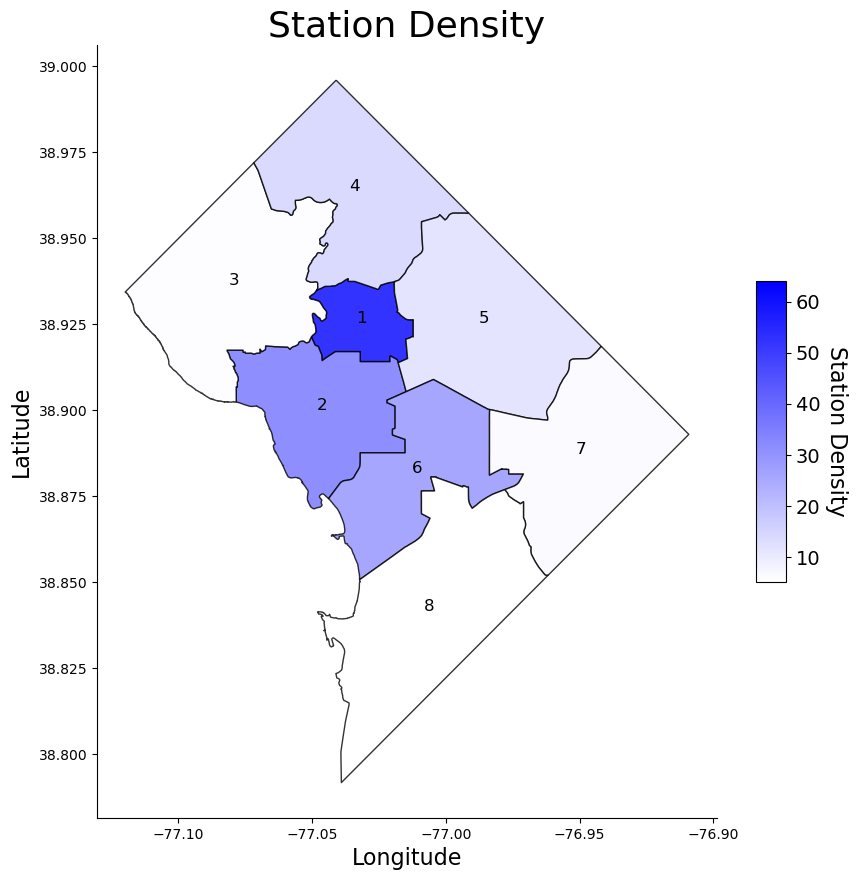

In [ ]:
import pandas as pd  
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value for blue color mapping
    normalized = (value - vmin) / (vmax - vmin)  # Standard normalization (no inversion)
    blue_value = int((1 - normalized) * 255)  # Reverse the color intensity for blue (higher values are lighter)
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'station_density',
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a gradient color bar using blue tones (reversed colormap)
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the normalization (max to min)
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # White to Blue reversed colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Station Density", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot



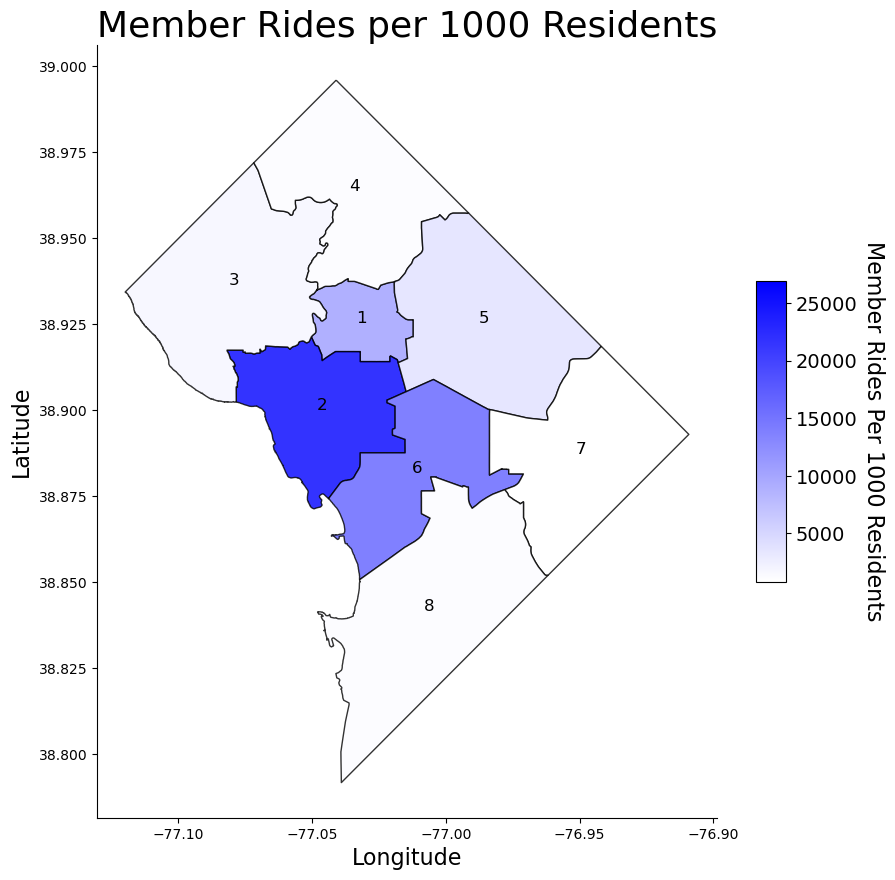

In [ ]:
import pandas as pd  
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(clean_data_select, geometry='geometry')

# Set the CRS (if known, replace with the correct EPSG code if necessary)
merged_gdf.set_crs(epsg=4326, inplace=True)  # Example for WGS 84

# Function to create a color mapping in blue tones based on the given column
def blue_tone_color(value, vmin, vmax):
    if pd.isna(value):  # Handle NaN values
        return '#e0e0e0'  # Light gray for NaN
    # Normalize the value for blue color mapping
    normalized = (value - vmin) / (vmax - vmin)  # Standard normalization (no inversion)
    blue_value = int((1 - normalized) * 255)  # Reverse the color intensity for blue (higher values are lighter)
    return f'#{blue_value:02x}{blue_value:02x}ff'  # Hex format for blue

# List of columns to plot
columns_to_plot = [
    'member_rides_per_1000_residents',
]

# Iterate through each column and create a plot
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(10, 13))

    # Determine vmin and vmax for color normalization
    vmin = merged_gdf[column].min()
    vmax = merged_gdf[column].max()

    # Plot the geometries with blue tones based on the column values
    merged_gdf.plot(ax=ax, 
                    color=merged_gdf[column].apply(lambda x: blue_tone_color(x, vmin, vmax)), 
                    edgecolor='black', alpha=0.8)

    # Add ward numbers directly on the plot
    for idx, row in merged_gdf.iterrows():
        centroid = row['geometry'].centroid
        ax.annotate(
            str(row['start_ward']),
            xy=(centroid.x, centroid.y),
            horizontalalignment='center',
            fontsize=12,
            color='black'
        )

    # Customize axis spines
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Create a gradient color bar using blue tones (reversed colormap)
    norm = mcolors.Normalize(vmin=vmax, vmax=vmin)  # Reverse the normalization (max to min)
    cmap = mcolors.LinearSegmentedColormap.from_list("blue_white", ["#ffffff", "#0000ff"])  # White to Blue reversed colormap
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)  # Define color map for the color bar
    sm.set_array([])

    # Add the color bar to the plot
    cbar = plt.colorbar(sm, ax=ax, shrink=0.3, aspect=10)
    
    # Set the label for the color bar with larger font size
    cbar.set_label(column.replace('_', ' ').title(), rotation=270, labelpad=20, fontsize=16)

    # Adjust font size for color bar ticks (legend)
    cbar.ax.tick_params(labelsize=14)

    # Set titles and labels with increased fontsize
    ax.set_title(f"Member Rides per 1000 Residents", fontsize=26)  # Column name will be the title
    ax.set_xlabel("Longitude", fontsize=16)
    ax.set_ylabel("Latitude", fontsize=16)

    # Show horizontal gridlines only
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)

    # Save the figure
    plt.savefig(f"ward_map_with_{column}.png", dpi=300, bbox_inches='tight')  # Save as PNG
    plt.show()  # Display the plot